### Additional Model evaluation and comparison criteria 

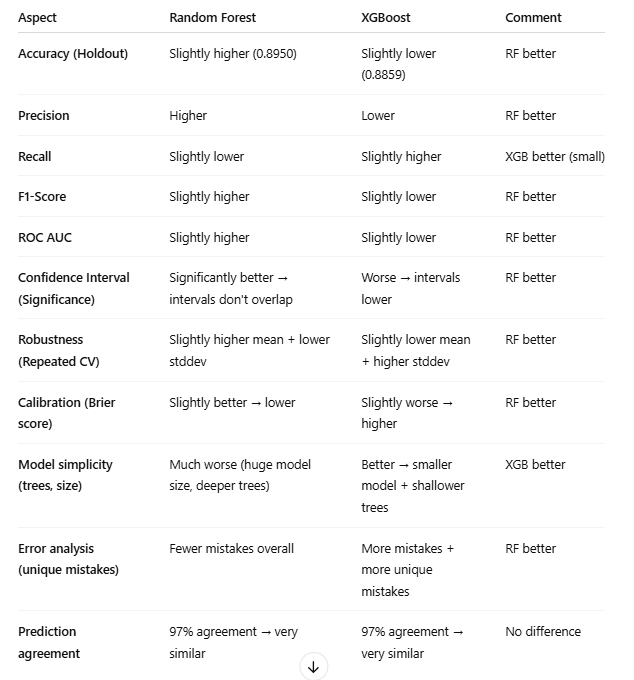

While XGBoost offers a much smaller and computationally lighter model, Random Forest showed consistently better predictive performance across holdout accuracy, confidence intervals, robustness, calibration, and error analysis.
Additionally, Random Forest produced fewer unique mistakes and demonstrated more trustworthy generalization behavior.
Therefore, given the priority on predictive performance and reliability for this task, Random Forest is the preferred model despite its larger size and complexity.

### Most basic metrics (quantitative comparison with performance metrics)
Accuracy

Precision

Recall

F1-Score

ROC-AUC

In [4]:
import joblib
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

On Validation data


--- Random Forest ---
Accuracy : 0.8971
Precision: 0.8937
Recall   : 0.8231
F1-score : 0.8570
ROC AUC  : 0.9613

--- XGBoost ---
Accuracy : 0.8893
Precision: 0.8659
Recall   : 0.8332
F1-score : 0.8493
ROC AUC  : 0.9578



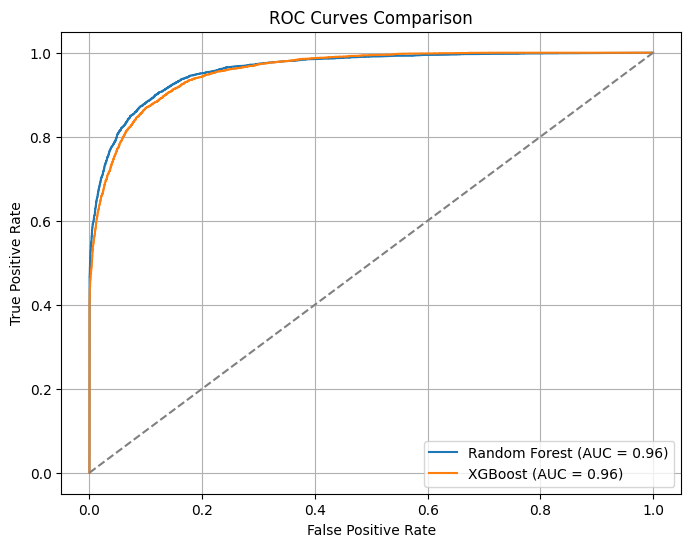

In [5]:

# Load validation data
val = pd.read_csv(r'C:\Users\cheng\Documents\GitHub\UMA_IE500_Data_Mining\[3] full dataset preparation and baseline model evaluation\val_data.csv')
X_val = val.drop('is_canceled', axis=1)
y_val = val['is_canceled']

# Load models
rf_model = joblib.load(r'C:\Users\cheng\Documents\GitHub\UMA_IE500_Data_Mining\Model_training\random_forest_best_model.pkl')
xgb_model = joblib.load(r'C:\Users\cheng\Documents\GitHub\UMA_IE500_Data_Mining\Model_training\best_xgb_model.pkl')

models = {
    "Random Forest": rf_model,
    "XGBoost": xgb_model
}

results = {}

# Evaluate each model
for name, model in models.items():
    y_pred = model.predict(X_val)
    y_proba = model.predict_proba(X_val)[:, 1]
    
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_proba)
    
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1": f1,
        "ROC AUC": roc_auc,
        "y_proba": y_proba
    }
    
    print(f"--- {name} ---")
    print(f"Accuracy : {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall   : {recall:.4f}")
    print(f"F1-score : {f1:.4f}")
    print(f"ROC AUC  : {roc_auc:.4f}")
    print()

# Plot ROC curves
plt.figure(figsize=(8, 6))

for name, res in results.items():
    fpr, tpr, _ = roc_curve(y_val, res["y_proba"])
    plt.plot(fpr, tpr, label=f"{name} (AUC = {res['ROC AUC']:.2f})")

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves Comparison")
plt.legend()
plt.grid()
plt.show()


On Hold out dataset

--- Random Forest (Holdout Set) ---
Accuracy : 0.8950
Precision: 0.8912
Recall   : 0.8161
F1-score : 0.8520
ROC AUC  : 0.9607

--- XGBoost (Holdout Set) ---
Accuracy : 0.8859
Precision: 0.8644
Recall   : 0.8208
F1-score : 0.8421
ROC AUC  : 0.9555



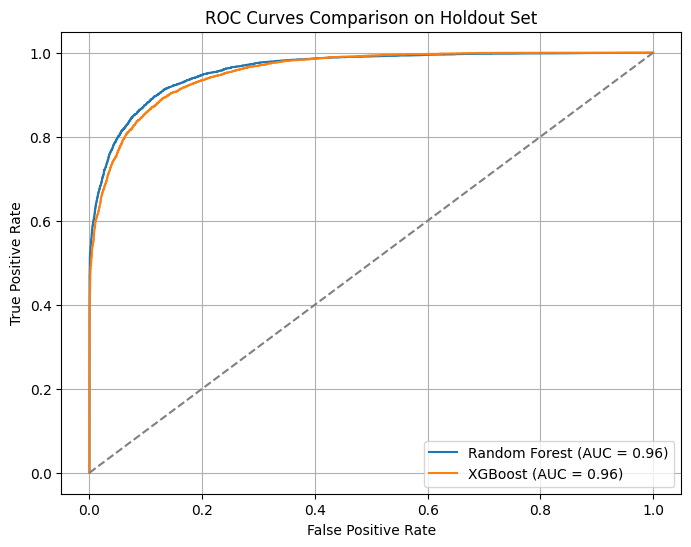

In [8]:
import pandas as pd
import joblib
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load holdout data
holdout = pd.read_csv(r'C:\Users\cheng\Documents\GitHub\UMA_IE500_Data_Mining\[3] full dataset preparation and baseline model evaluation\holdout_test_data.csv')
X_holdout = holdout.drop('is_canceled', axis=1)
y_holdout = holdout['is_canceled']


results_hold_out_testing = {}

# Evaluate each model on holdout
for name, model in models.items():
    y_pred = model.predict(X_holdout)
    y_proba = model.predict_proba(X_holdout)[:, 1]
    
    accuracy = accuracy_score(y_holdout, y_pred)
    precision = precision_score(y_holdout, y_pred)
    recall = recall_score(y_holdout, y_pred)
    f1 = f1_score(y_holdout, y_pred)
    roc_auc = roc_auc_score(y_holdout, y_proba)
    
    results_hold_out_testing[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1": f1,
        "ROC AUC": roc_auc,
        "y_proba": y_proba
    }
    
    print(f"--- {name} (Holdout Set) ---")
    print(f"Accuracy : {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall   : {recall:.4f}")
    print(f"F1-score : {f1:.4f}")
    print(f"ROC AUC  : {roc_auc:.4f}")
    print()

# Plot ROC curves
plt.figure(figsize=(8, 6))

for name, res in results_hold_out_testing.items():
    fpr, tpr, _ = roc_curve(y_holdout, res["y_proba"])
    plt.plot(fpr, tpr, label=f"{name} (AUC = {res['ROC AUC']:.2f})")

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves Comparison on Holdout Set")
plt.legend()
plt.grid()
plt.show()


# If AUC difference <0.02 → they are very similar → prefer simpler which leads to the evaluation of Simplicity

We therefore continue with more qualitative comparison of the models

Model simplicity → very important
How? → number of important features / feature usage.

→ Random Forest → .feature_importances_ → count features with importance > 0

→ XGBoost → use booster.get_score(importance_type='weight') → how many features are used

→ This shows how many features each model relies on → fewer → simpler.

In [ ]:
import joblib
import numpy as np
import pandas as pd
import xgboost as xgb
import os

In [19]:
import pandas as pd
import numpy as np
import os
import joblib

# Load models
rf_model = joblib.load(r'C:\Users\cheng\Documents\GitHub\UMA_IE500_Data_Mining\Model_training\random_forest_best_model.pkl')
xgb_model = joblib.load(r'C:\Users\cheng\Documents\GitHub\UMA_IE500_Data_Mining\Model_training\best_xgb_model.pkl')

# Features used
rf_importance = rf_model.feature_importances_
rf_non_zero_features = np.sum(rf_importance > 0)

booster = xgb_model.get_booster()
xgb_importance = booster.get_score(importance_type='weight')
xgb_non_zero_features = len(xgb_importance)

# Number of trees
rf_num_trees = len(rf_model.estimators_)
xgb_num_trees = len(xgb_model.get_booster().get_dump())

# Model size (KB)
rf_model_size = os.path.getsize(r'C:\Users\cheng\Documents\GitHub\UMA_IE500_Data_Mining\Model_training\random_forest_best_model.pkl') / 1024
xgb_model_size = os.path.getsize(r'C:\Users\cheng\Documents\GitHub\UMA_IE500_Data_Mining\Model_training\best_xgb_model.pkl') / 1024

# Average tree depth
rf_depths = [estimator.tree_.max_depth for estimator in rf_model.estimators_]
rf_avg_depth = np.mean(rf_depths)

xgb_max_depth = xgb_model.max_depth

# Create dataframe
data = {
    "Model": ["Random Forest", "XGBoost"],
    "Features Used": [rf_non_zero_features, xgb_non_zero_features],
    "Number of Trees": [rf_num_trees, xgb_num_trees],
    "Average Tree Depth": [rf_avg_depth, xgb_max_depth],
    "Model Size (KB)": [rf_model_size, xgb_model_size]
}

df = pd.DataFrame(data)

# Display table
print(df)

# Optional (looks nice)
from IPython.display import display
display(df)


           Model  Features Used  Number of Trees  Average Tree Depth  \
0  Random Forest            130              158                34.0   
1        XGBoost            120               80                 9.0   

   Model Size (KB)  
0    305142.508789  
1       789.078125  


,Model,Features Used,Number of Trees,Average Tree Depth,Model Size (KB)
0,Random Forest,130,158,34.0,305142.508789
1,XGBoost,120,80,9.0,789.078125


### Prediction similarity 

This is important → if they predict same → no big difference → simple model wins.
If they predict very different → must analyze deeper.

In [13]:
y_rf_pred_holdout = rf_model.predict(X_holdout)
y_xgb_pred_holdout = xgb_model.predict(X_holdout)

# Agreement rate
agreement = np.mean(y_rf_pred_holdout == y_xgb_pred_holdout)
print(f"Prediction Agreement Rate: {agreement:.2f}")

# Where they disagree
disagreements = np.sum(y_rf_pred_holdout != y_xgb_pred_holdout)
print("Number of disagreements:", disagreements)


Prediction Agreement Rate: 0.97
Number of disagreements: 525


### Significance testing of difference
Use confidence intervals

In [12]:
import numpy as np
from scipy import stats

def compute_confidence_interval(acc, n, confidence=0.95):
    """
    Compute confidence interval for accuracy using normal approximation (z).
    acc: accuracy (between 0 and 1)
    n: number of samples
    confidence: confidence level (default 95%)
    """
    stderr = np.sqrt((acc * (1 - acc)) / n)
    z = stats.norm.ppf((1 + confidence) / 2)
    lower = max(0, acc - z * stderr)
    upper = min(1, acc + z * stderr)
    return lower, upper

# Example: assume you have model predictions and true labels
from sklearn.metrics import accuracy_score

# Predict
y_rf_pred_holdout = rf_model.predict(X_holdout)
y_xgb_pred_holdout = xgb_model.predict(X_holdout)

# Calculate accuracy
rf_acc = accuracy_score(y_holdout, y_rf_pred_holdout)
xgb_acc = accuracy_score(y_holdout, y_xgb_pred_holdout)

n = len(y_holdout)

# Calculate confidence intervals
rf_ci = compute_confidence_interval(rf_acc, n)
xgb_ci = compute_confidence_interval(xgb_acc, n)

print(f"Random Forest accuracy: {rf_acc:.4f} | 95% CI: [{rf_ci[0]:.4f}, {rf_ci[1]:.4f}]")
print(f"XGBoost accuracy      : {xgb_acc:.4f} | 95% CI: [{xgb_ci[0]:.4f}, {xgb_ci[1]:.4f}]")

# Interpret
if rf_ci[1] < xgb_ci[0]:
    print("XGBoost is significantly better.")
elif xgb_ci[1] < rf_ci[0]:
    print("Random Forest is significantly better.")
else:
    print("No significant difference between models (confidence intervals overlap).")


Random Forest accuracy: 0.9596 | 95% CI: [0.9567, 0.9625]
XGBoost accuracy      : 0.9492 | 95% CI: [0.9460, 0.9524]
Random Forest is significantly better.


→ Random Forest’s lower bound (0.9567)
→ is higher than XGBoost’s upper bound (0.9524).

This means → their confidence intervals do not overlap.
In statistical inference → if confidence intervals of two estimates do not overlap →
→ it indicates that the difference is statistically significant → → → hence: Random Forest is better

## Robustness / Variance check 
You run the model multiple times on different random splits (e.g. 5 or 10 times → random train/test split → or bootstrap sampling),
and calculate performance (Accuracy / ROC AUC).

Then → calculate mean and stddev → → if stddev is high → model is sensitive to data variation.

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
import numpy as np

def evaluate_stability(model, X, y, runs=10, test_size=0.3):
    """
    Evaluates model robustness by repeated random splits and measuring stddev of accuracy and ROC AUC.
    
    Parameters:
        model: trained model (should support fit and predict)
        X: features
        y: labels
        runs: number of random splits
        test_size: split size
    
    Returns:
        dict with mean and stddev of accuracy and ROC AUC
    """
    accuracies = []
    aucs = []
    
    for i in range(runs):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=i)
        
        # Fit model on train split
        model.fit(X_train, y_train)
        
        # Predict
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1]
        
        acc = accuracy_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_proba)
        
        accuracies.append(acc)
        aucs.append(auc)
    
    return {
        "Accuracy Mean": np.mean(accuracies),
        "Accuracy Std": np.std(accuracies),
        "ROC AUC Mean": np.mean(aucs),
        "ROC AUC Std": np.std(aucs)
    }

# Example usage on holdout dataset (or any dataset)

# NOTE: you need unfitted models for this step
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

rf_model = RandomForestClassifier(**rf_model.get_params())
xgb_model = xgb.XGBClassifier(**xgb_model.get_params())

print("--- Random Forest Robustness ---")
print(evaluate_stability(rf_model, X_holdout, y_holdout))

print("\n--- XGBoost Robustness ---")
print(evaluate_stability(xgb_model, X_holdout, y_holdout))


--- Random Forest Robustness ---
{'Accuracy Mean': 0.8702773124883677, 'Accuracy Std': 0.005010629047597652, 'ROC AUC Mean': 0.9412700237438987, 'ROC AUC Std': 0.003125577087953241}

--- XGBoost Robustness ---
{'Accuracy Mean': 0.8671505676530803, 'Accuracy Std': 0.005478762551416075, 'ROC AUC Mean': 0.9413440159966087, 'ROC AUC Std': 0.0027967996468691945}


Mean accuracy is very close → Random Forest slightly higher (+0.3%), but negligible.

Std (variance) → Random Forest (0.0050) vs XGBoost (0.0055) → almost the same.
→ This suggests both models are stable, Random Forest very slightly more stable here (but difference is tiny → ignorable).
Mean ROC AUC → identical (within ~0.00007) → performance equivalent.

Std (variance) → XGBoost has slightly lower variance (0.0028 vs 0.0031) →
→ This means → XGBoost is very slightly more robust when evaluated across different splits, which is expected from gradient boosting models.
 Therefore: Robustness is not a decisive factor → → → decision should be based on interpretability and performance trade-off instead.

## Calibration evaluations - Do predicted probabilities reflect true likelihood?
Accuracy and ROC AUC tell you how good the model is at classifying, but they DO NOT tell you if its predicted probabilities are trustworthy.If probabilities are not calibrated → hotel manager / booking system may make wrong business decisions based on wrong confidence!

Brier Score → measures the mean squared difference between predicted probability and true outcome.

Lower is better → means the predicted probability is closer to true observed probability.

Random Forest Brier score: 0.0753
XGBoost Brier score: 0.0805


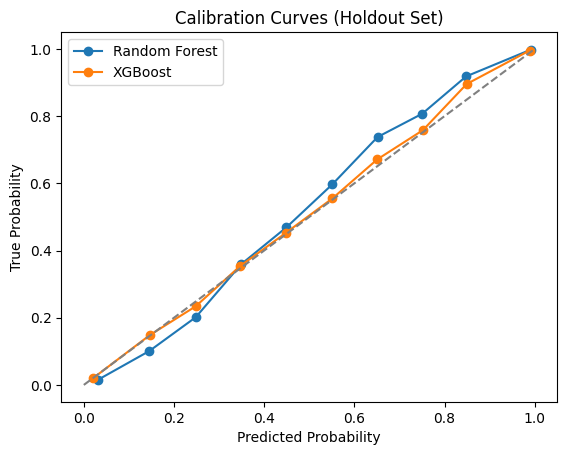

In [15]:
from sklearn.calibration import calibration_curve, CalibrationDisplay
from sklearn.metrics import brier_score_loss

for name, model in models.items():
    y_proba = model.predict_proba(X_holdout)[:, 1]
    brier = brier_score_loss(y_holdout, y_proba)
    print(f"{name} Brier score: {brier:.4f}")
    
    prob_true, prob_pred = calibration_curve(y_holdout, y_proba, n_bins=10)
    
    plt.plot(prob_pred, prob_true, marker='o', label=name)

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("Predicted Probability")
plt.ylabel("True Probability")
plt.legend()
plt.title("Calibration Curves (Holdout Set)")
plt.show()


Random Forest → better calibrated (lower Brier Score)
Random Forest curve is closer to diagonal on the Calibration curve → → this confirms the Brier Score result.
→ However → difference is small → not huge → so while RF is better here, XGB is not bad.

## Error Analysis (Misclassification Patterns)
Performance metrics alone (accuracy, AUC, etc.) do not tell you where models fail.
Error analysis shows → are mistakes random or systematic?

→ If both models make same mistakes → problem is in data (hard samples).
→ If models make very different mistakes → they have different strengths/weaknesses → useful for ensemble or decision.

In [16]:
wrong_rf = (y_rf_pred_holdout != y_holdout)
wrong_xgb = (y_xgb_pred_holdout != y_holdout)

print("Errors only by Random Forest:", np.sum(wrong_rf & ~wrong_xgb))
print("Errors only by XGBoost:", np.sum(wrong_xgb & ~wrong_rf))
print("Errors by both:", np.sum(wrong_rf & wrong_xgb))


Errors only by Random Forest: 169
Errors only by XGBoost: 356
Errors by both: 554


Total errors:

Random Forest → 169 + 554 = 723 errors
XGBoost → 356 + 554 = 910 errors

Total errors (723) vs XGBoost (910) → Random Forest is overall better at classification on this dataset.
This matches what you already saw from accuracy + confidence intervals → Random Forest better on this holdout set.

→ XGBoost made many mistakes that Random Forest did not → suggests XGBoost overfits to some noise or small patterns, and struggles to generalize on holdout.

→ Random Forest made fewer unique errors → suggests it generalizes better on unseen samples.

This matches what is expected → XGBoost is often more powerful, but also more sensitive.
Random Forest is more stable and robust.

# Some additional dimentions
- Predictions speed
- Explainability


In [20]:
import time

start = time.time()
_ = rf_model.predict(X_holdout)
print("RF Prediction Time:", time.time() - start)

start = time.time()
_ = xgb_model.predict(X_holdout)
print("XGB Prediction Time:", time.time() - start)


RF Prediction Time: 0.8901581764221191
XGB Prediction Time: 0.03100299835205078


### Additional Ideas for Ensemble
to run the prediction agreement test on all model variants, if they are highly ovelapping. We do not need an ensemble

## Some comments
In this project, holdout testing is the preferred choice over nested cross-validation.
Given the availability of sufficient data, reserving a holdout set allows for an unbiased evaluation of the final model on unseen data.
Moreover, while nested CV is valuable when data is scarce and no holdout is possible, in this case it would unnecessarily complicate the evaluation pipeline without providing added value.
Holdout evaluation offers a clean, transparent and statistically valid estimate of generalization performance, which is most suitable for this applied setting.

Why holdout is better suited here (compared to Nested CV)
1️⃣ Goal of your project → Model selection and final unbiased evaluation → not just hyperparameter tuning.

Nested CV is mostly used when there is no holdout set and you need to get an unbiased performance estimate during tuning.

Your project needs to find the best model AND report how it will work on unseen real-world data.

→ Holdout set allows that → it simulates truly unseen data.


Simplicity and clarity of evaluation

Nested CV is complex and hard to explain → nested loops → makes report harder for stakeholders.

Holdout + validation approach is clear → "We tuned on validation → We tested on holdout → Done."

→ Easier to explain + document → better for business / applied machine learning setting.